In [2]:
import pandas as pd
import networkx as nx
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns
sns.set_palette(palette='muted', n_colors=3)
from IPython.display import display
from collections import defaultdict

In [3]:
def get_network_layer(G, layer=''):
    return G.subgraph([n for n, d in G.nodes(data=True) if (d.get('layer') == layer)]).copy()

def get_network_largest_connected_component(G):
    largest_cc = max(nx.connected_components(G), key=len)
    return G.subgraph(largest_cc).copy()

## Load Network and separate it by layers

In [27]:
network = 'complete'  # 'complete', 'meiotic-entry', 'meiotic-exit'

print('Loading Complete Network')
rGfile_gpickle = 'results/net_{network:s}_mlayer_backbone_modules.gpickle'.format(network='complete')
G = nx.read_gpickle(rGfile_gpickle)

Loading Complete Network


In [28]:
#Keep only the backbone
print('Total number of Edges: {:,d}'.format(G.number_of_edges()))
print('> Computing edges to remove')
edges_to_remove = [(i, j) for i, j, d in G.edges(data=True) if (
    ((d.get('type') == 'intra') and (d.get('metric-backbone', False) == False))
)]
print('Removing {:,d} edges'.format(len(edges_to_remove)))
G.remove_edges_from(edges_to_remove)
print('Number of backbone of Edges: {:,d}'.format(G.number_of_edges()))

Total number of Edges: 6,650,427
> Computing edges to remove
Removing 6,491,319 edges
Number of backbone of Edges: 159,108


In [29]:
print('Separate Layers')
HSG = get_network_layer(G, 'HS')
MMG = get_network_layer(G, 'MM')
DMG = get_network_layer(G, 'DM')

Separate Layers


In [30]:
print('Largest Components')
HSGc = get_network_largest_connected_component(HSG)
MMGc = get_network_largest_connected_component(MMG)
DMGc = get_network_largest_connected_component(DMG)

Largest Components


## Network Analysis

In [31]:
#Number of nodes / edges
print('HS')
print('Number of Nodes: {:,d}'.format(HSG.number_of_nodes()))
print('Number of Edges: {:,d}'.format(HSG.number_of_edges()))
HSbe = len([(i, j) for i, j, d in HSG.edges(data=True) if d.get('metric-backbone', False) == True])
print('Number of backbone Edges: {:,d}'.format(HSbe))
#
print('MM')
print('Number of Nodes: {:,d}'.format(MMG.number_of_nodes()))
print('Number of Edges: {:,d}'.format(MMG.number_of_edges()))
MMbe = len([(i, j) for i, j, d in MMG.edges(data=True) if d.get('metric-backbone', False) == True])
print('Number of backbone Edges: {:,d}'.format(MMbe))
#
print('DM')
print('Number of Nodes: {:,d}'.format(DMG.number_of_nodes()))
print('Number of Edges: {:,d}'.format(DMG.number_of_edges()))
DMbe = len([(i, j) for i, j, d in DMG.edges(data=True) if d.get('metric-backbone', False) == True])
print('Number of backbone Edges: {:,d}'.format(DMbe))

HS
Number of Nodes: 19,623
Number of Edges: 42,329
Number of backbone Edges: 42,329
MM
Number of Nodes: 16,505
Number of Edges: 56,117
Number of backbone Edges: 56,117
DM
Number of Nodes: 10,348
Number of Edges: 33,346
Number of backbone Edges: 33,346


In [32]:
# Connected Components (size of nodes in each)
cc_HS = [len(c) for c in sorted(nx.connected_components(HSG), key=len, reverse=True)]
nr_cc_HS = len(cc_HS)
print("HS\n Number of connected components: {nr:,d} \n Top10: {top10:}".format(nr=nr_cc_HS, top10=cc_HS[:10]))
#
cc_MM = [len(c) for c in sorted(nx.connected_components(MMG), key=len, reverse=True)]
nr_cc_MM = len(cc_HS)
print("MM\n Number of connected components: {nr:,d} \n Top10: {top10:}".format(nr=nr_cc_MM, top10=cc_MM[:10]))
#
cc_DM = [len(c) for c in sorted(nx.connected_components(DMG), key=len, reverse=True)]
nr_cc_DM = len(cc_DM)
print("DM\n Number of connected components: {nr:,d} \n Top10: {top10:}".format(nr=nr_cc_DM, top10=cc_DM[:10]))

HS
 Number of connected components: 8,171 
 Top10: [11453, 1, 1, 1, 1, 1, 1, 1, 1, 1]
MM
 Number of connected components: 8,171 
 Top10: [11411, 11, 2, 2, 2, 2, 1, 1, 1, 1]
DM
 Number of connected components: 1,756 
 Top10: [8589, 2, 2, 2, 2, 1, 1, 1, 1, 1]


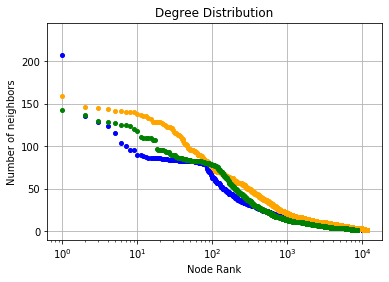

In [33]:
#Degree Distribution
degree_HS = [deg for i, deg in HSGc.degree()]
degree_MM = [deg for i, deg in MMGc.degree()]
degree_DM = [deg for i, deg in DMGc.degree()]
# Plot
plt.title('Degree Distribution')
plt.plot(sorted(degree_HS, reverse=True), lw=0, marker='o', ms=4, color='blue', rasterized=True)
plt.plot(sorted(degree_MM, reverse=True), lw=0, marker='o', ms=4, color='orange', rasterized=True)
plt.plot(sorted(degree_DM, reverse=True), lw=0, marker='o', ms=4, color='green', rasterized=True)
plt.ylabel('Number of neighbors')
plt.xlabel('Node Rank')
plt.xscale('log')
#plt.yscale('log')
plt.grid()

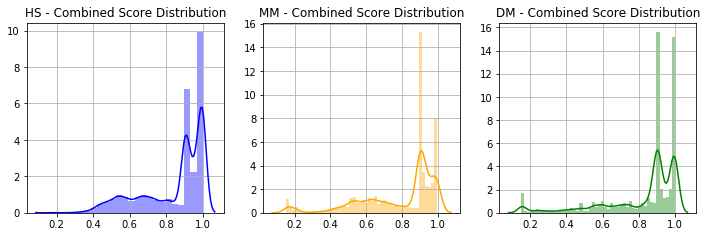

In [34]:
#
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, nrows=1, figsize=(12,3.5))
# Score Distribution
score_HS = [d['weight'] for i, j, d in HSGc.edges(data=True)]
score_MM = [d['weight'] for i, j, d in MMGc.edges(data=True)]
score_DM = [d['weight'] for i, j, d in DMGc.edges(data=True)]
# Plot
ax1.set_title('HS - Combined Score Distribution')
ax2.set_title('MM - Combined Score Distribution')
ax3.set_title('DM - Combined Score Distribution')
sns.distplot(score_HS, ax=ax1, bins=25, norm_hist=True, color='blue', label='HS')
sns.distplot(score_MM, ax=ax2, color='orange', label='MM')
sns.distplot(score_DM, ax=ax3, color='green', label='DM')
#plt.plot(sorted(score_HS, reverse=True), lw=0, marker='o', ms=4, color='blue', rasterized=True)
#plt.plot(sorted(score_MM, reverse=True), lw=0, marker='o', ms=4, color='orange', rasterized=True)
#plt.plot(sorted(score_DM, reverse=True), lw=0, marker='o', ms=4, color='green', rasterized=True)
#plt.ylabel('Number of neighbors')
#plt.xlabel('Node Rank')
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim([0,1100])
ax1.grid()
ax2.grid()
ax3.grid()

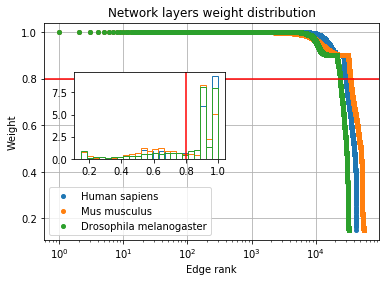

In [35]:
# Score Distribution
weight_HS = sorted([d['weight'] for i, j, d in HSGc.edges(data=True)], reverse=True)
weight_MM = sorted([d['weight'] for i, j, d in MMGc.edges(data=True)], reverse=True)
weight_DM = sorted([d['weight'] for i, j, d in DMGc.edges(data=True)], reverse=True)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

# Title
ax.set_title('Network layers weight distribution')

# Plots
phs, = ax.plot(weight_HS, lw=0, marker='o', ms=4, color='#1f77b4', rasterized=True)
pmm, = ax.plot(weight_MM, lw=0, marker='o', ms=4, color='#ff7f0e', rasterized=True)
pdm, = ax.plot(weight_DM, lw=0, marker='o', ms=4, color='#2ca02c', rasterized=True)

# Insert Distribution Plot
axin = inset_axes(ax, width='50%', height='50%', loc='lower left', bbox_to_anchor=(.075, .35, .9, .8), bbox_transform=ax.transAxes)
axin.hist(weight_HS, bins=23, density=True, edgecolor='#1f77b4', facecolor=(0, 0, 0, 0), lw=1)
axin.hist(weight_MM, bins=23, density=True, edgecolor='#ff7f0e', facecolor=(0, 0, 0, 0), lw=1)
axin.hist(weight_DM, bins=23, density=True, edgecolor='#2ca02c', facecolor=(0, 0, 0, 0), lw=1)

# Threshold horizontal line
ax.axhline(y=0.8, color='red')
axin.axvline(x=0.8, color='red')

ax.set_ylabel('Weight')
ax.set_xlabel('Edge rank')
ax.set_xscale('log')

# Legend
ax.legend(
    handles=(phs, pmm, pdm),
    labels=('Human sapiens', 'Mus musculus', 'Drosophila melanogaster'),
    loc='lower left'
)

# Grid
ax.grid()

## Module Analysis

In [36]:
# Retrieve Module Information
modules_infomap = nx.get_node_attributes(G, name='modules-infomap')
n_modules_infomap = max(modules_infomap.values()) + 1
core = nx.get_node_attributes(G, name='core')
mammals = nx.get_node_attributes(G, name='mammals')
df_m = pd.DataFrame(data={'infomap': modules_infomap, 'core': core, 'mammals': mammals})
# HS
modules_HS_louvain = nx.get_node_attributes(HSG, name='modules-HS-mammals-louvain')
modules_HS_infomap = nx.get_node_attributes(HSG, name='modules-HS-mammals-infomap')
core_HS = nx.get_node_attributes(HSG, name='core')
gene_HS = nx.get_node_attributes(HSG, name='label')
df_HS_m = pd.DataFrame(data={'gene': gene_HS,'louvain': modules_HS_louvain, 'infomap': modules_HS_infomap, 'core': core_HS})
df_HS_m['core'] = df_HS_m['core'].fillna(False)
n_modules_HS_louvain = max(modules_HS_louvain.values()) + 1
n_modules_HS_infomap = max(modules_HS_infomap.values()) + 1
# MM
modules_MM_louvain = nx.get_node_attributes(MMG, name='modules-MM-mammals-louvain')
modules_MM_infomap = nx.get_node_attributes(MMG, name='modules-MM-mammals-infomap')
core_MM = nx.get_node_attributes(MMG, name='core')
gene_MM = nx.get_node_attributes(MMG, name='label')
df_MM_m = pd.DataFrame(data={'label':gene_MM, 'louvain': modules_MM_louvain, 'infomap': modules_MM_infomap, 'core': core_MM})
df_MM_m['core'] = df_MM_m['core'].fillna(False)
n_modules_MM_louvain = max(modules_MM_louvain.values()) + 1
n_modules_MM_infomap = max(modules_MM_infomap.values()) + 1
# DM
modules_DM_louvain = nx.get_node_attributes(DMG, name='modules-DM-infomap')
modules_DM_infomap = nx.get_node_attributes(DMG, name='modules-DM-louvain')
core_DM = nx.get_node_attributes(DMG, name='core')
gene_DM = nx.get_node_attributes(DMG, name='label')
fert_DM = nx.get_node_attributes(DMG, name='mean-fert-rate')
df_DM_m = pd.DataFrame(data={'gene': gene_DM,'louvain':modules_DM_louvain, 'infomap':modules_DM_infomap, 'core':core_DM, 'mean-fert-rate': fert_DM})
df_DM_m['core'] = df_DM_m['core'].fillna(False)
n_modules_DM_infomap = max(modules_DM_louvain.values()) + 1
n_modules_DM_louvain = max(modules_DM_infomap.values()) + 1

In [37]:
# Number of modules per layer
dfM = pd.DataFrame.from_records([
    ('Multi', 'Infomap', n_modules_infomap),
    ('HS', 'Louvain', n_modules_HS_louvain),
    ('HS', 'Infomap', n_modules_HS_infomap),
    ('MM', 'Louvain', n_modules_MM_louvain),
    ('MM', 'Infomap', n_modules_MM_infomap),
    ('DM', 'Louvain', n_modules_DM_louvain),
    ('DM', 'Infomap', n_modules_DM_infomap),
], columns=['Layer', 'Algorithm','Nr Modules'])
dfM

,Layer,Algorithm,Nr Modules
0,Multi,Infomap,15
1,HS,Louvain,14
2,HS,Infomap,34
3,MM,Louvain,18
4,MM,Infomap,40
5,DM,Louvain,1763
6,DM,Infomap,1823


In [38]:
# HS - Module Size Distribution
df_HS_c = pd.DataFrame({
    'nr-mods-louvain': df_HS_m['louvain'].value_counts().value_counts(),
    'nr-mods-infomap': df_HS_m['infomap'].value_counts().value_counts()
    })
df_HS_c.index.name = 'mod-size'
df_HS_c

,nr-mods-louvain,nr-mods-infomap
mod-size,,
1,6.0,6.0
2,NaN,2.0
3,NaN,4.0
4,NaN,1.0
5,NaN,3.0
6,NaN,2.0
7,NaN,2.0
9,NaN,1.0
22,NaN,1.0


In [39]:
# MM - Module Size Distribution
df_MM_c = pd.DataFrame({
    'nr-mods-louvain': df_MM_m['louvain'].value_counts().value_counts(),
    'nr-mods-infomap': df_MM_m['infomap'].value_counts().value_counts()
    })
df_MM_c.index.name = 'mod-size'
df_MM_c

,nr-mods-louvain,nr-mods-infomap
mod-size,,
1,10.0,10.0
2,NaN,3.0
3,NaN,3.0
6,NaN,2.0
8,NaN,2.0
12,NaN,1.0
13,NaN,1.0
15,NaN,1.0
16,NaN,1.0


In [40]:
# DM - Module Size Distribution
df_DM_c = pd.DataFrame({
    'nr-mods-louvain': df_DM_m['louvain'].value_counts().value_counts(),
    'nr-mods-infomap': df_DM_m['infomap'].value_counts().value_counts()
    })
df_DM_c.index.name = 'mod-size'
df_DM_c

,nr-mods-louvain,nr-mods-infomap
mod-size,,
1,1751.0,1751.0
2,11.0,5.0
3,7.0,NaN
4,3.0,NaN
5,5.0,NaN
6,1.0,NaN
7,5.0,NaN
8,1.0,NaN
9,1.0,NaN


## Number of Core Genes in Module

In [41]:
def count_cores_per_module(df):
    return pd.Series({
        'n_nodes': df.shape[0],
        'n_cores': df['core'].sum(),
    })

In [43]:
df_MM_g = df_MM_m.groupby('louvain').apply(count_cores_per_module)
df_MM_g.index.name = 'louvain module'
df_MM_g['%_cores'] = df_MM_g['n_cores'] / df_MM_g['n_nodes']
df_MM_g.sort_values('%_cores', ascending=False, inplace=True)
display(df_MM_g.iloc[:8,:])
##
df_MM_g = df_MM_m.groupby('infomap').apply(count_cores_per_module)
df_MM_g.index.name = 'infomap module'
df_MM_g['%_cores'] = df_MM_g['n_cores'] / df_MM_g['n_nodes']
df_MM_g.sort_values('%_cores', ascending=False, inplace=True)
display(df_MM_g.iloc[:8,:])

,n_nodes,n_cores,%_cores
louvain module,,,
13.0,1,1,1.000000
15.0,1,1,1.000000
2.0,221,159,0.719457
0.0,306,201,0.656863
4.0,331,212,0.640483
5.0,130,77,0.592308
3.0,165,97,0.587879
6.0,56,26,0.464286


,n_nodes,n_cores,%_cores
infomap module,,,
37.0,1,1,1.000000
34.0,1,1,1.000000
23.0,18,18,1.000000
2.0,215,157,0.730233
13.0,18,13,0.722222
0.0,201,141,0.701493
24.0,58,40,0.689655
9.0,93,64,0.688172


In [44]:
df_DM_g = df_DM_m.groupby('louvain').apply(count_cores_per_module)
df_DM_g.index.name = 'louvain module'
df_DM_g['%_cores'] = df_DM_g['n_cores'] / df_DM_g['n_nodes']
df_DM_g.sort_values('%_cores', ascending=False, inplace=True)
display(df_DM_g.iloc[:8,:])
##
df_DM_g = df_DM_m.groupby('infomap').apply(count_cores_per_module)
df_DM_g.index.name = 'infomap module'
df_DM_g['%_cores'] = df_DM_g['n_cores'] / df_DM_g['n_nodes']
df_DM_g.sort_values('%_cores', ascending=False, inplace=True)
display(df_DM_g.iloc[:8,:])

,n_nodes,n_cores,%_cores
louvain module,,,
85,5,2,0.400000
25,44,11,0.250000
140,4,1,0.250000
189,5,1,0.200000
48,77,15,0.194805
57,11,2,0.181818
9,118,20,0.169492
156,12,2,0.166667


,n_nodes,n_cores,%_cores
infomap module,,,
3,1711,253,0.147867
8,442,55,0.124434
1,2590,248,0.095753
0,1813,170,0.093767
5,840,65,0.077381
2,1159,52,0.044866
1179,1,0,0.000000
1175,1,0,0.000000


In [46]:
# Exploring some modules
df_DM_m.loc[df_DM_m['louvain']==85, ['gene','core','mean-fert-rate']]

,gene,core,mean-fert-rate
FBgn0032671,JMJD4,False,NaN
FBgn0015351,CG14906,True,NaN
FBgn0032259,CG6144,False,NaN
FBgn0032149,CG4036,False,NaN
FBgn0036210,CG14130,True,0.802777


## Predicting Fertility Rate

In [51]:
print("Calculating: eigevector centrality")
eigen_centrality = nx.eigenvector_centrality(DMGc)
print('Calculating: degree centrality')
degree_centrality = nx.degree_centrality(DMGc)
print('Calculating: betweenness centrality')
#bet_centrality = nx.betweenness_centrality(DMGc)
print('Calculating: page rank')
page_rank = nx.pagerank(DMGc)
print('Calculating: clustering coefficient')
#clustering = nx.clustering(DMGc, weight='weight')

Calculating: eigevector centrality
Calculating: degree centrality
Calculating: betweenness centrality
Calculating: page rank
Calculating: clustering coefficient


In [52]:
dfDMGc = pd.DataFrame.from_dict(dict(DMGc.nodes(data=True)), orient='index')

In [53]:
dfDMGc['eigen_centrality'] = dfDMGc.index.map(eigen_centrality)
dfDMGc['degree_centrality'] = dfDMGc.index.map(degree_centrality)
dfDMGc['bet_centrality'] = 1
dfDMGc['page_rank'] = dfDMGc.index.map(page_rank)
dfDMGc['clustering'] = 1
# Too Heavy
#dfDMGc['clustering'] = dfDMGc.index.map(clustering)
#dfDMGc['bet_centrality'] = dfDMGc.index.map(bet_centrality)

In [68]:
display(dfDMGc.columns)

Index(['id_string', 'label', 'Middle', 'TPM', 'biotype', 'meiotic-entry',
       'meiotic-exit', 'core', 'logFPKM', 'layer', 'status',
       'previously-reported', 'function', 'validated-rnai',
       'modules-DM-louvain', 'modules-DM-infomap', 'modules-infomap',
       'mean-fert-rate', 'std-fert-rate', 'known-MM-phenotype',
       'recorded-phenotype', 'new-DM-phenotype', 'known-DM-phenotype',
       'known-HS-phenotype', 'eigen_centrality', 'degree_centrality',
       'bet_centrality', 'page_rank', 'clustering'],
      dtype='object')

In [55]:
# Only those with mean-fert-rate
rows = ~dfDMGc['mean-fert-rate'].isnull()
cols = ['mean-fert-rate', 'eigen_centrality', 'degree_centrality', 'bet_centrality', 'page_rank', 'clustering']
dfDMGc.loc[rows,cols].corr(method='pearson')

,mean-fert-rate,eigen_centrality,degree_centrality,bet_centrality,page_rank,clustering
mean-fert-rate,1.000000,0.055354,0.049249,NaN,-0.013042,NaN
eigen_centrality,0.055354,1.000000,0.726224,NaN,0.512742,NaN
degree_centrality,0.049249,0.726224,1.000000,NaN,0.843674,NaN
bet_centrality,NaN,NaN,NaN,NaN,NaN,NaN
page_rank,-0.013042,0.512742,0.843674,NaN,1.000000,NaN
clustering,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
# Loop every module
for m in set(dfDMGc['modules-DM-louvain'].tolist()):
    print('Module: {:d}'.format(m))
    rows = (dfDMGc['modules-DM-louvain'] == m)
    cols = ['mean-fert-rate', 'eigen_centrality', 'degree_centrality', 'bet_centrality', 'page_rank', 'clustering']
    display(dfDMGc.loc[rows,cols].corr(method='pearson'))

Module: 0


,mean-fert-rate,eigen_centrality,degree_centrality,bet_centrality,page_rank,clustering
mean-fert-rate,1.000000,0.077102,0.044866,NaN,0.040444,NaN
eigen_centrality,0.077102,1.000000,0.704348,NaN,0.550617,NaN
degree_centrality,0.044866,0.704348,1.000000,NaN,0.894647,NaN
bet_centrality,NaN,NaN,NaN,NaN,NaN,NaN
page_rank,0.040444,0.550617,0.894647,NaN,1.000000,NaN
clustering,NaN,NaN,NaN,NaN,NaN,NaN


Module: 1


,mean-fert-rate,eigen_centrality,degree_centrality,bet_centrality,page_rank,clustering
mean-fert-rate,1.000000,0.061525,0.063321,NaN,-0.038089,NaN
eigen_centrality,0.061525,1.000000,0.683726,NaN,0.496452,NaN
degree_centrality,0.063321,0.683726,1.000000,NaN,0.872007,NaN
bet_centrality,NaN,NaN,NaN,NaN,NaN,NaN
page_rank,-0.038089,0.496452,0.872007,NaN,1.000000,NaN
clustering,NaN,NaN,NaN,NaN,NaN,NaN


Module: 2


,mean-fert-rate,eigen_centrality,degree_centrality,bet_centrality,page_rank,clustering
mean-fert-rate,1.000000,-0.237045,-0.017403,NaN,-0.197092,NaN
eigen_centrality,-0.237045,1.000000,0.082319,NaN,0.020409,NaN
degree_centrality,-0.017403,0.082319,1.000000,NaN,0.782413,NaN
bet_centrality,NaN,NaN,NaN,NaN,NaN,NaN
page_rank,-0.197092,0.020409,0.782413,NaN,1.000000,NaN
clustering,NaN,NaN,NaN,NaN,NaN,NaN


Module: 3


,mean-fert-rate,eigen_centrality,degree_centrality,bet_centrality,page_rank,clustering
mean-fert-rate,1.000000,-0.063545,-0.134365,NaN,-0.079438,NaN
eigen_centrality,-0.063545,1.000000,0.097126,NaN,0.042352,NaN
degree_centrality,-0.134365,0.097126,1.000000,NaN,0.925405,NaN
bet_centrality,NaN,NaN,NaN,NaN,NaN,NaN
page_rank,-0.079438,0.042352,0.925405,NaN,1.000000,NaN
clustering,NaN,NaN,NaN,NaN,NaN,NaN


Module: 5


,mean-fert-rate,eigen_centrality,degree_centrality,bet_centrality,page_rank,clustering
mean-fert-rate,1.000000,0.234290,0.147915,NaN,0.166850,NaN
eigen_centrality,0.234290,1.000000,0.970184,NaN,0.349967,NaN
degree_centrality,0.147915,0.970184,1.000000,NaN,0.544101,NaN
bet_centrality,NaN,NaN,NaN,NaN,NaN,NaN
page_rank,0.166850,0.349967,0.544101,NaN,1.000000,NaN
clustering,NaN,NaN,NaN,NaN,NaN,NaN


Module: 70


,mean-fert-rate,eigen_centrality,degree_centrality,bet_centrality,page_rank,clustering
mean-fert-rate,NaN,NaN,NaN,NaN,NaN,NaN
eigen_centrality,NaN,1.000000,-0.044086,NaN,-0.122033,NaN
degree_centrality,NaN,-0.044086,1.000000,NaN,0.939445,NaN
bet_centrality,NaN,NaN,NaN,NaN,NaN,NaN
page_rank,NaN,-0.122033,0.939445,NaN,1.000000,NaN
clustering,NaN,NaN,NaN,NaN,NaN,NaN


Module: 8


,mean-fert-rate,eigen_centrality,degree_centrality,bet_centrality,page_rank,clustering
mean-fert-rate,1.000000,0.306017,0.286429,NaN,0.214478,NaN
eigen_centrality,0.306017,1.000000,0.436271,NaN,0.285653,NaN
degree_centrality,0.286429,0.436271,1.000000,NaN,0.942071,NaN
bet_centrality,NaN,NaN,NaN,NaN,NaN,NaN
page_rank,0.214478,0.285653,0.942071,NaN,1.000000,NaN
clustering,NaN,NaN,NaN,NaN,NaN,NaN


Module: 111


,mean-fert-rate,eigen_centrality,degree_centrality,bet_centrality,page_rank,clustering
mean-fert-rate,NaN,NaN,NaN,NaN,NaN,NaN
eigen_centrality,NaN,1.0,1.0,NaN,1.0,NaN
degree_centrality,NaN,1.0,1.0,NaN,1.0,NaN
bet_centrality,NaN,NaN,NaN,NaN,NaN,NaN
page_rank,NaN,1.0,1.0,NaN,1.0,NaN
clustering,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
# Select a Module
nm = [n for n,d in DMGc.nodes(data=True) if d['modules-DM-louvain'] == 5]
DMGcm = nx.subgraph(DMGc, nm).copy()

#nme = [(i, j) for i, j, d in DMGcm.edges(data=True) if (d.get('combined_score', -1) >= 990)]
#DMGcm = nx.edge_subgraph(DMGcm, nme).copy()
        
print('Nodes: {:d}'.format(DMGcm.number_of_nodes()))
print('Edges: {:d}'.format(DMGcm.number_of_edges()))

Nodes: 840
Edges: 4585


In [65]:
# Onion
cores = nx.onion_layers(DMGcm)
#cores = nx.core_number(DMGcm)
#
dd = defaultdict(list)
for k,v in sorted(cores.items()):
    dd[v].append(k)
shell = list(dd.values())

In [66]:
# Plot a Module
#pos = nx.shell_layout(DMGcm, nlist=shell, scale=1, center=[0,0])
#pos = nx.spiral_layout(DMGcm, resolution=0.5)
pos = nx.spring_layout(DMGcm, weight='weight', scale=0.1, iterations=1000, k=5)
#pos = nx.circular_layout(DMGcm)

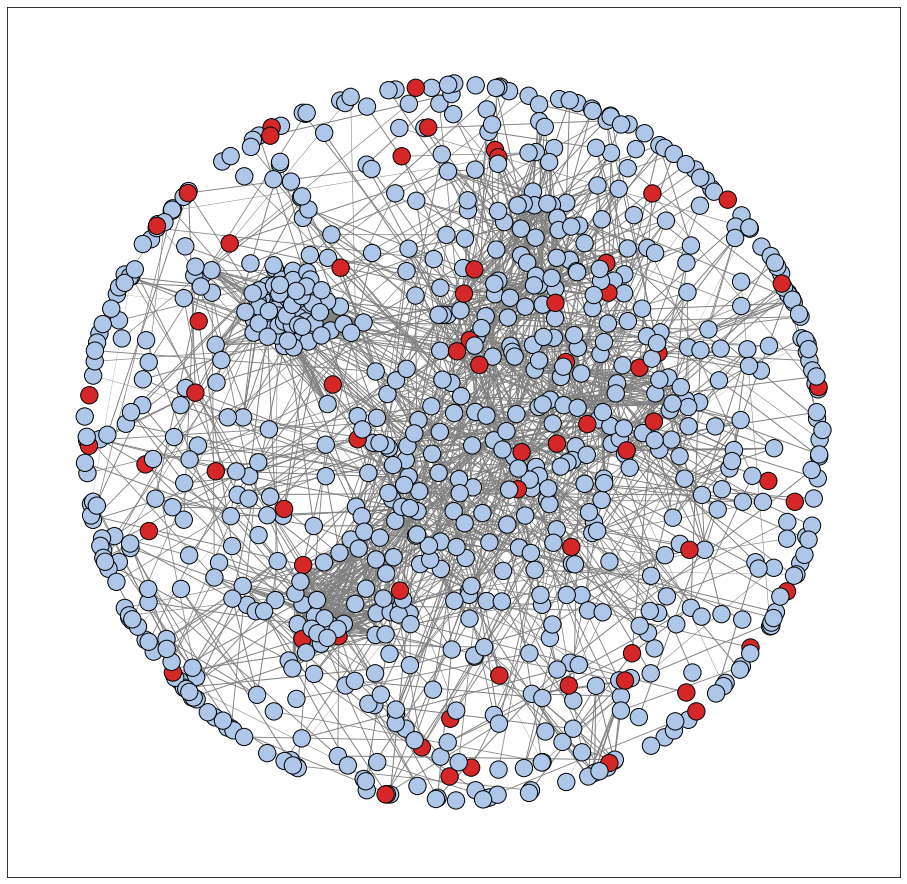

In [67]:
fig, ax = plt.subplots(figsize=(16,16))

node_color = ['#d62728' if (d.get('core', False)==True) else '#aec7e8' for n, d in DMGcm.nodes(data=True)]
nx.draw_networkx_nodes(DMGcm, ax=ax, pos=pos, node_size=300, node_color=node_color, edgecolors='black')

edge_width = [d['weight'] for i,j,d in DMGcm.edges(data=True)]
nx.draw_networkx_edges(DMGcm, ax=ax, pos=pos, width=edge_width, edge_color='gray')
#nx.draw_networkx_labels(DMGcm, ax=ax, pos=pos)
plt.show()